In [2]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from coniferest.isoforest import IsolationForest
from coniferest.pineforest import PineForest

from pathlib import Path

import os
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import OrderedDict

from validutils_zwad.read_data import read_data

%config InlineBackend.figure_format = 'retina'

In [3]:
# Load fakes Df and DR4 DF
fakes_df = pd.read_csv("./dataframes/fakes_df.csv.gzip", compression='gzip', index_col=0)
dr4_df = pd.read_csv("./dataframes/dr4_df.csv.gzip", compression='gzip', index_col=0)

In [4]:
fakes_df

,amplitude_magn_g,anderson_darling_normal_magn_g,beyond_1_std_magn_g,beyond_2_std_magn_g,cusum_magn_g,inter_percentile_range_2_magn_g,inter_percentile_range_10_magn_g,inter_percentile_range_25_magn_g,kurtosis_magn_g,linear_fit_slope_magn_g,...,standard_deviation_magn_r,stetson_K_magn_r,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,skew_flux_r,stetson_K_flux_r
sid,,,,,,,,,,,,,,,,,,,,,
6439074373,2.313271,6.242598,0.544218,0.000000,0.458069,4.586686,4.375262,3.713085,-1.596927,0.005899,...,1.631735,0.946339,17.689695,15.523734,0.437505,1.315818,-0.902408,1.148051,0.874291,0.773280
9020928999,2.027956,6.452107,0.429448,0.000000,0.444023,3.941975,3.314264,2.360711,-1.283150,0.020341,...,1.056116,0.922816,17.861500,11.056737,0.425569,0.794369,-0.423881,0.892017,0.947871,0.790745
6011793767,2.428476,16.336357,0.472656,0.000000,0.448958,4.651444,4.122466,3.430849,-1.429027,0.007894,...,1.330221,0.909978,17.374739,24.971611,0.458264,0.785898,-1.554181,0.888269,0.386377,0.835887
4229763628,2.439133,3.030501,0.386555,0.000000,0.448217,4.545591,3.327130,2.430038,-1.277114,0.020108,...,1.403626,0.934688,16.848856,11.799259,0.457372,0.944930,-1.367946,0.972413,0.601326,0.789646
6426848530,2.265145,2.495316,0.504762,0.019048,0.430610,3.011551,2.360701,1.924666,-0.368413,0.006352,...,0.992992,0.919996,17.645218,6.531303,0.448206,0.582325,-1.291218,0.767379,0.513864,0.858954
6031286883,2.260002,6.587531,0.496503,0.000000,0.449040,4.501166,4.036433,3.082117,-1.428517,0.015139,...,1.292708,0.919051,17.772713,11.349049,0.456618,0.721447,-1.440829,0.850721,0.452070,0.818922
905180321,1.773118,3.047131,0.465347,0.000000,0.449048,3.418056,3.085295,2.138866,-1.442838,0.008475,...,1.054671,0.888930,18.169949,2.101050,0.430176,0.462636,-1.135499,0.681337,0.286532,0.857670


In [5]:
dr4_df

,amplitude_magn_g,anderson_darling_normal_magn_g,beyond_1_std_magn_g,beyond_2_std_magn_g,cusum_magn_g,inter_percentile_range_2_magn_g,inter_percentile_range_10_magn_g,inter_percentile_range_25_magn_g,kurtosis_magn_g,linear_fit_slope_magn_g,...,standard_deviation_magn_r,stetson_K_magn_r,weighted_mean_magn_r,anderson_darling_normal_flux_r,cusum_flux_r,excess_variance_flux_r,kurtosis_flux_r,mean_variance_flux_r,skew_flux_r,stetson_K_flux_r
245101100000933,0.177000,3.696596,0.370000,0.030000,0.158870,0.341499,0.286501,0.158501,-0.787381,-0.000212,...,0.097860,0.851286,15.842624,2.711263,0.099072,0.007498,-0.944294,0.087656,-0.507748,0.844530
245101100009703,0.293500,2.724011,0.290000,0.060000,0.184453,0.523001,0.333000,0.104000,0.201318,-0.001444,...,0.130134,0.869721,15.653200,4.130320,0.156431,0.013800,-1.050300,0.118238,-0.059173,0.909857
245101100010242,0.328500,5.493390,0.190000,0.050000,0.229448,0.559999,0.220499,0.094999,5.286414,-0.001808,...,0.068449,0.672620,16.533829,4.853297,0.187999,0.004273,8.948397,0.067449,2.465220,0.683464
245104200000799,0.329500,2.502895,0.467290,0.000000,0.089224,0.593760,0.490400,0.350000,-1.362500,0.000242,...,0.123850,0.858237,17.937359,1.524028,0.131790,0.011540,-0.980239,0.112776,-0.026306,0.870056
245104200000939,2.293000,12.605539,0.066038,0.056604,0.177457,4.114202,1.156300,0.426999,9.274009,-0.003301,...,0.394907,0.789900,15.854793,1.492581,0.322914,0.081920,0.337605,0.286570,0.109400,0.675794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,0.483999,1.274301,0.293578,0.055046,0.187018,0.595680,0.369799,0.157999,1.613005,-0.001550,...,0.107312,0.680863,18.940697,5.417244,0.233112,0.008082,5.852146,0.105139,1.738649,0.670839
1597113100019088,0.323501,1.453954,0.271186,0.076271,0.202899,0.490780,0.252100,0.097000,1.162233,-0.001054,...,0.079516,0.702109,17.359133,3.377403,0.154508,0.005559,5.974216,0.076836,1.682657,0.710270
1597113100031221,0.074500,0.266636,0.307692,0.025641,0.153808,0.093640,0.060800,0.032499,1.197538,-0.000101,...,0.031295,0.753234,13.399863,0.861085,0.155385,0.000762,1.899416,0.029034,0.619902,0.756356
1687113100001669,0.159000,1.292890,0.290000,0.030000,0.197375,0.234001,0.160500,0.078501,0.713989,0.000201,...,0.080559,0.760526,16.968489,2.260365,0.096540,0.005724,2.714355,0.077019,1.257489,0.769287


In [6]:
def applypca(dataset_real, dataset_fakes):
    X_real = dataset_real
    X_fakes = dataset_fakes
    
    ss = StandardScaler()
    scaled_X_real = ss.fit_transform(X_real)
    #scaled_X_fakes = ss.fit_transform(X_fakes)
    pca = PCA(15)
    
    # apply same PCA to both real and fakes data
    #pcs_X_fakes = pca.fit_transform(scaled_X_fakes)
    pcs_X_real = pca.fit_transform(scaled_X_real)
    #pcs_X_real = pca.fit_transform(ss.transform(X_real))
    pcs_X_fakes = pca.transform(ss.transform(X_fakes))
    
    score = pcs_X_real[:,0:2]
    coeff = np.transpose(pca.components_[0:2, :])
    
    return pca, pcs_X_real, pcs_X_fakes, score, coeff

In [7]:
def pcaplot(score, coeff, datacolor):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=datacolor, s=6, alpha=0.6) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width= .003, color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.12, coeff[i,1] * 1.12, list(fakes_df.columns.values)[i], 
                     color = 'darkblue', ha = 'center', va = 'center', fontsize = 6)

In [8]:
pca, pcs_X_real, pcs_X_fakes, score, coeff = applypca(dr4_df, fakes_df)

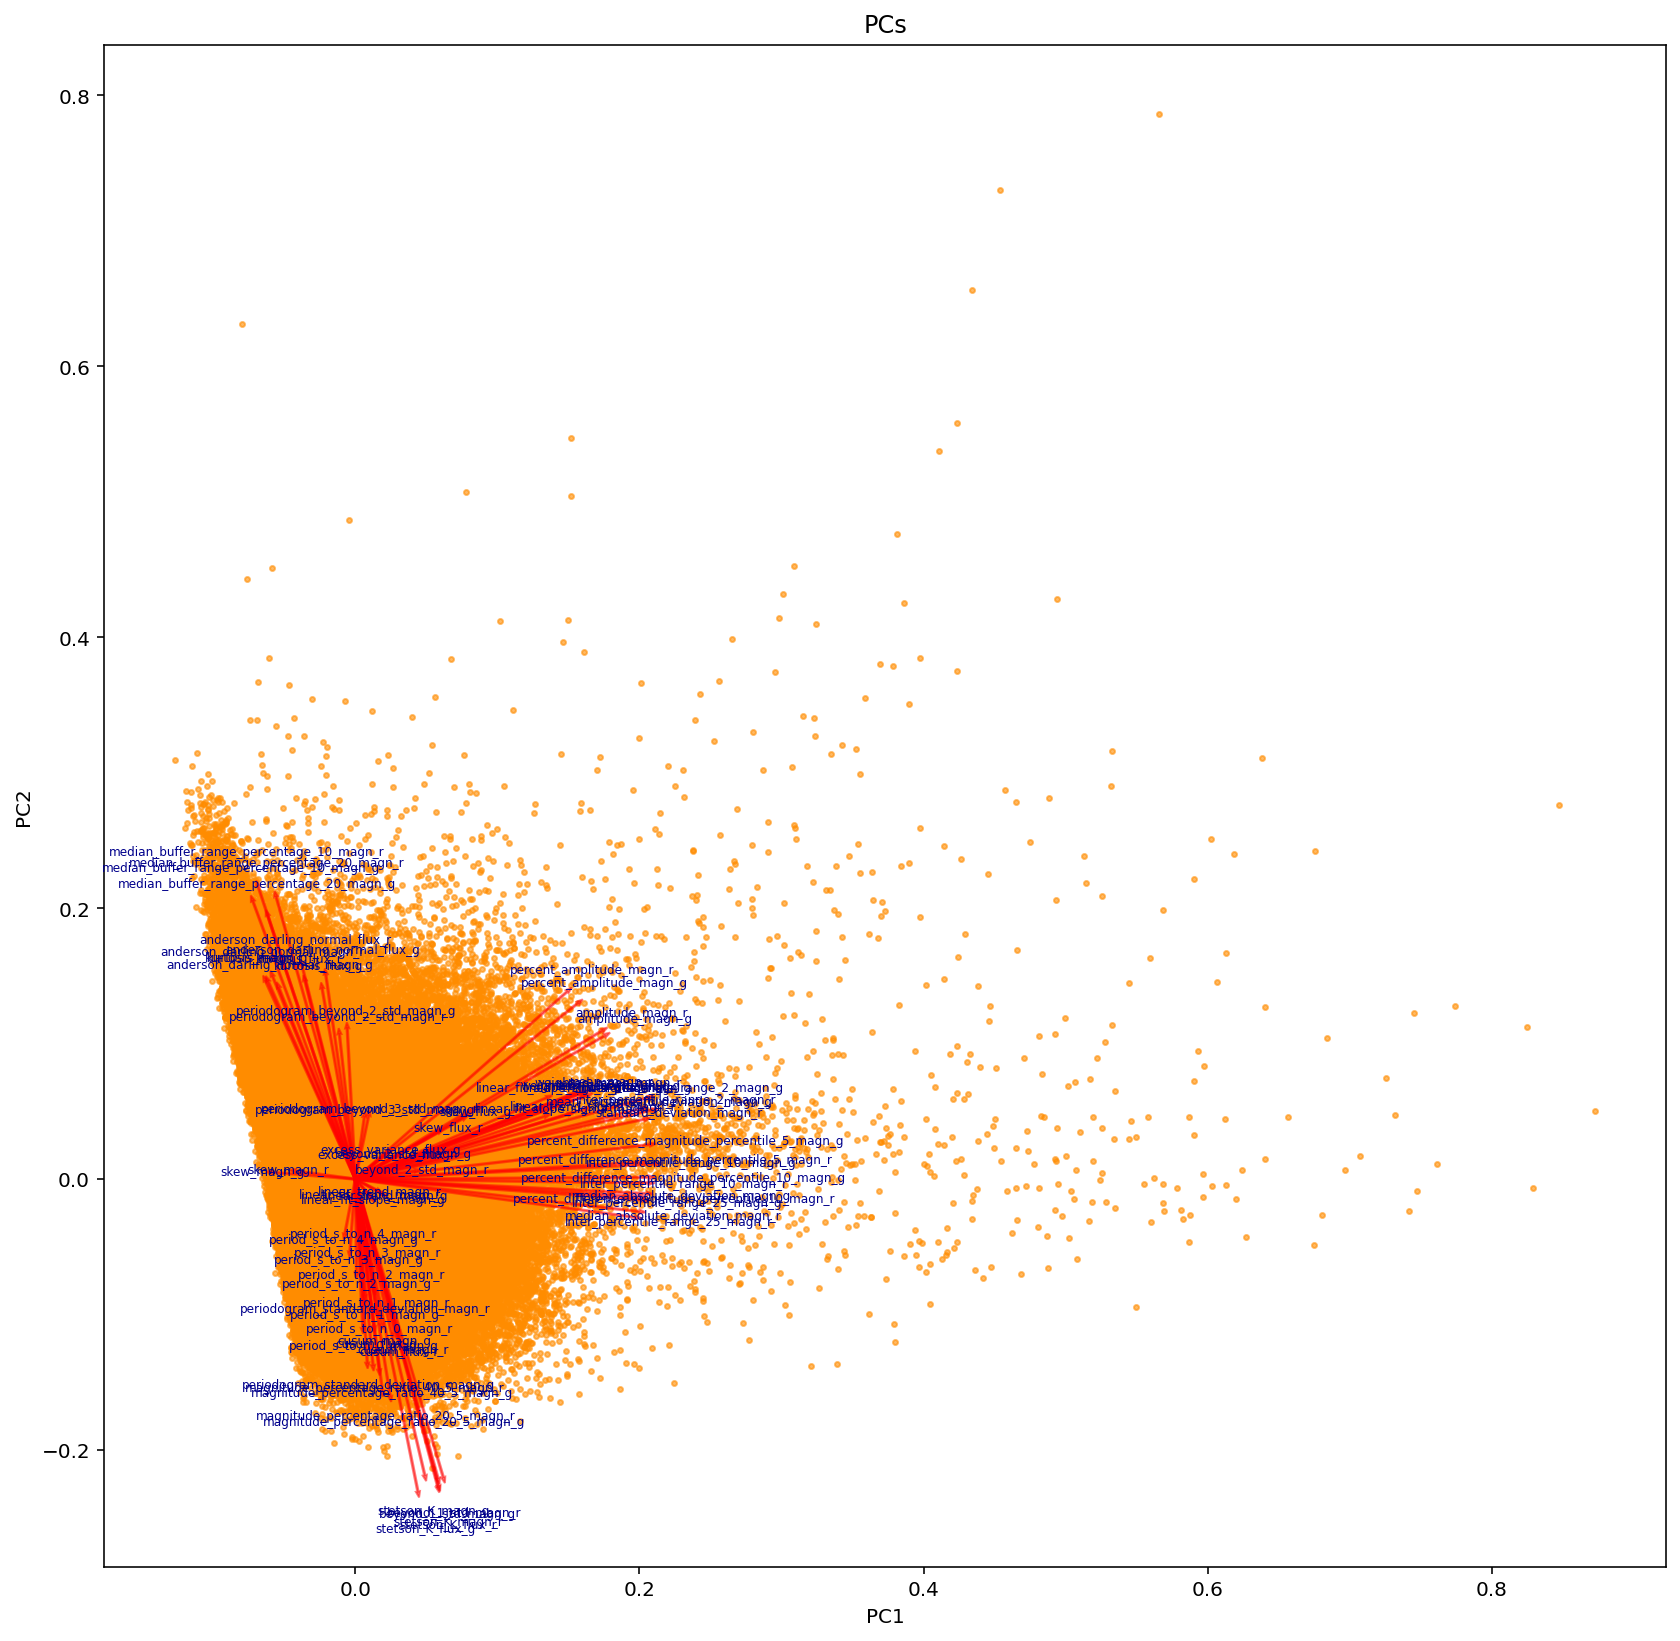

In [9]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("PCs")

pcaplot(pcs_X_real[:,0:2], np.transpose(pca.components_[0:2, :]), 'darkorange') 
#plt.savefig('../figs/pca/pca_overlay_data.png', dpi=400, bbox_inches='tight')

In [10]:
pcs_X_real_df = pd.DataFrame(data=pcs_X_real, index=dr4_df.index)
pcs_X_real_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
245101100000933,1.848374,-4.414713,-5.619387,5.260007,-0.999931,1.886963,2.324809,0.253377,-0.611758,-0.512955,-1.362276,-0.376073,0.583994,-0.447068,-2.001800
245101100009703,2.967064,-1.671175,-6.837336,3.595945,4.496144,0.035345,7.659400,0.350320,1.741457,-1.396644,0.553434,-1.513357,-0.017226,-4.068247,-2.117607
245101100010242,-0.108842,2.405274,-5.404213,0.148662,7.596955,0.413171,4.990459,0.843872,0.302472,-0.536536,-1.212276,-0.685067,-0.255091,-2.268555,-0.897638
245104200000799,7.365672,-5.579897,-5.080346,6.771816,0.701483,4.046052,2.639159,-1.075885,-2.850858,-0.919155,-1.641905,0.873320,0.193416,2.257791,-2.171007
245104200000939,30.154807,10.945089,-8.899690,12.322188,17.628170,-5.978543,18.175196,3.574387,2.799001,-3.242612,-3.686069,-4.507431,-3.213874,-4.330590,0.683496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,3.946898,2.210204,-5.614792,0.057008,10.193997,-0.193686,7.076623,-0.936228,-2.615102,-0.239834,0.090248,-0.498651,0.971073,0.823267,0.723964
1597113100019088,0.413335,0.540809,-4.052421,-0.078614,4.553517,-0.578718,2.777073,0.468078,-0.762003,-0.079861,0.292282,-0.767255,0.061662,-0.738615,-0.840130
1597113100031221,-5.107737,-2.974856,-3.773432,1.666602,-0.358649,0.263062,0.706888,2.276320,0.666474,-0.080467,-1.445859,0.246889,-0.401691,-0.167881,1.636332
1687113100001669,-1.281994,-1.793778,-4.068860,0.637412,-1.954905,0.749961,-0.604822,1.066689,-0.803296,0.218810,-1.163812,0.519359,1.080880,-0.615965,0.830666


In [11]:
pcs_X_fakes_df = pd.DataFrame(data=pcs_X_fakes, index=fakes_df.index)
pcs_X_fakes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
6439074373,93.032887,-3.357458,7.582036,36.872818,-14.574250,-6.119955,-16.225297,8.750974,8.869691,-12.304460,-8.499934,-5.825803,-2.644615,-15.899223,1.996770
9020928999,67.895401,-2.313617,15.033869,21.701535,-41.699117,-8.470297,-64.200854,-1.830526,10.747603,-4.445951,-11.555210,1.873999,0.450509,-14.082454,-4.377187
6011793767,74.036038,-6.571253,18.709935,29.178635,-29.231553,-3.201390,-39.257479,2.347411,10.972844,-8.590697,-5.137615,-5.716588,-3.570346,-8.040635,-1.671687
4229763628,80.824635,-3.555305,21.322198,26.570258,-53.860953,-10.804949,-75.066664,-0.726632,13.894775,-7.088551,-10.280165,-2.828952,-3.151725,-14.592504,-1.846537
6426848530,63.379093,-3.879017,11.517758,20.879759,-44.006769,-7.105398,-71.454295,-6.997645,10.961442,-2.284864,-14.317186,1.703787,1.614993,-18.522250,-14.452979
6031286883,78.632268,-4.419617,17.132182,26.513695,-45.391630,-7.832658,-62.502009,0.198878,9.863996,-7.373623,-12.290341,-0.290133,0.185923,-10.150832,0.049162
905180321,67.388810,-0.386172,6.812726,21.738153,-44.962525,-10.196985,-73.835527,-5.022807,9.889790,-2.971051,-17.505154,1.326771,5.704660,-17.863339,-10.675954


### Find variance of 82 PCs...

In [12]:
fakes_pca_var_ratio = pca.explained_variance_ratio_
fakes_pca_var_ratio

array([0.24780439, 0.16882909, 0.11947891, 0.05727007, 0.04507644,
       0.03742808, 0.0337129 , 0.03110718, 0.02488483, 0.02080672,
       0.0171788 , 0.01586854, 0.01563901, 0.01434543, 0.01362778])

In [13]:
np.cumsum(fakes_pca_var_ratio)

array([0.24780439, 0.41663348, 0.5361124 , 0.59338247, 0.63845891,
       0.67588698, 0.70959989, 0.74070706, 0.76559189, 0.78639861,
       0.80357741, 0.81944595, 0.83508496, 0.84943039, 0.86305817])

In [14]:
print("summed variance First 15 PCs:", np.cumsum(fakes_pca_var_ratio)[14])

summed variance First 15 PCs: 0.8630581719051972


### Most important features mathematically

print(abs( pca.components_ )) #has shape (7, 7) [n_components, n_features].

pca_num = []
for i in range(1, 8):
    pca_num.append('PCA{}'.format(i))

fakes_pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=fakes_df.columns)
#fakes_pca_comp.to_csv('../data/fakes_pca_feature_importance.csv')
fakes_pca_comp

pca_num = []
for i in range(1, 8):
    pca_num.append('PCA{}'.format(i))

dr4_pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=dr4_df.columns)
#dr4_pca_comp.to_csv('../data/dr4_pca_feature_importance.csv')
dr4_pca_comp

labels = dr4_df.columns
pca1 = abs(np.array(dr4_pca_comp.loc[['PCA1']])[0])
pca2 = abs(np.array(dr4_pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, pca1, width, label='PCA 1 (XX% of var)', color='g')
#rects2 = ax.bar(x + width/2, pca2, width, label='PCA 2 (XX% of var)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute value of Importance')
ax.set_title('Importance of features by principal component for dr4')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylim(0, 0.25)
ax.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

#plt.savefig('../figs/pca/fakes_pca_barchart.png', dpi=400, bbox_inches='tight')

# Of 1st PC (37.1% var), find the 15 most important features

Tops_df =pd.DataFrame(fakes_pca_comp.apply(lambda x:list(fakes_pca_comp.columns[np.array(np.abs(x)).argsort()[::-1][:15]]), axis=1).to_list(),  
                           columns=['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 
                                   'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15'])
Tops_df.loc[0]


top15_feats_list = Tops_df.loc[0].to_list()
top15_feats_list

# include the columns you want
fakes_top15feat_df = fakes_df[fakes_df.columns[fakes_df.columns.isin(top15_feats_list)]]
dr4_top15feat_df = dr4_df[dr4_df.columns[dr4_df.columns.isin(top15_feats_list)]]
fakes_top15feat_df.head(7)

# Repeat kdtree experiment w/ first 5 PCs (all 82 features) as input
# Find match to DR4

In [15]:
pcs_X_real_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
245101100000933,1.848374,-4.414713,-5.619387,5.260007,-0.999931,1.886963,2.324809,0.253377,-0.611758,-0.512955,-1.362276,-0.376073,0.583994,-0.447068,-2.001800
245101100009703,2.967064,-1.671175,-6.837336,3.595945,4.496144,0.035345,7.659400,0.350320,1.741457,-1.396644,0.553434,-1.513357,-0.017226,-4.068247,-2.117607
245101100010242,-0.108842,2.405274,-5.404213,0.148662,7.596955,0.413171,4.990459,0.843872,0.302472,-0.536536,-1.212276,-0.685067,-0.255091,-2.268555,-0.897638
245104200000799,7.365672,-5.579897,-5.080346,6.771816,0.701483,4.046052,2.639159,-1.075885,-2.850858,-0.919155,-1.641905,0.873320,0.193416,2.257791,-2.171007
245104200000939,30.154807,10.945089,-8.899690,12.322188,17.628170,-5.978543,18.175196,3.574387,2.799001,-3.242612,-3.686069,-4.507431,-3.213874,-4.330590,0.683496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597113100010642,3.946898,2.210204,-5.614792,0.057008,10.193997,-0.193686,7.076623,-0.936228,-2.615102,-0.239834,0.090248,-0.498651,0.971073,0.823267,0.723964
1597113100019088,0.413335,0.540809,-4.052421,-0.078614,4.553517,-0.578718,2.777073,0.468078,-0.762003,-0.079861,0.292282,-0.767255,0.061662,-0.738615,-0.840130
1597113100031221,-5.107737,-2.974856,-3.773432,1.666602,-0.358649,0.263062,0.706888,2.276320,0.666474,-0.080467,-1.445859,0.246889,-0.401691,-0.167881,1.636332
1687113100001669,-1.281994,-1.793778,-4.068860,0.637412,-1.954905,0.749961,-0.604822,1.066689,-0.803296,0.218810,-1.163812,0.519359,1.080880,-0.615965,0.830666


In [16]:
pcs_X_fakes_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sid,,,,,,,,,,,,,,,
6439074373,93.032887,-3.357458,7.582036,36.872818,-14.574250,-6.119955,-16.225297,8.750974,8.869691,-12.304460,-8.499934,-5.825803,-2.644615,-15.899223,1.996770
9020928999,67.895401,-2.313617,15.033869,21.701535,-41.699117,-8.470297,-64.200854,-1.830526,10.747603,-4.445951,-11.555210,1.873999,0.450509,-14.082454,-4.377187
6011793767,74.036038,-6.571253,18.709935,29.178635,-29.231553,-3.201390,-39.257479,2.347411,10.972844,-8.590697,-5.137615,-5.716588,-3.570346,-8.040635,-1.671687
4229763628,80.824635,-3.555305,21.322198,26.570258,-53.860953,-10.804949,-75.066664,-0.726632,13.894775,-7.088551,-10.280165,-2.828952,-3.151725,-14.592504,-1.846537
6426848530,63.379093,-3.879017,11.517758,20.879759,-44.006769,-7.105398,-71.454295,-6.997645,10.961442,-2.284864,-14.317186,1.703787,1.614993,-18.522250,-14.452979
6031286883,78.632268,-4.419617,17.132182,26.513695,-45.391630,-7.832658,-62.502009,0.198878,9.863996,-7.373623,-12.290341,-0.290133,0.185923,-10.150832,0.049162
905180321,67.388810,-0.386172,6.812726,21.738153,-44.962525,-10.196985,-73.835527,-5.022807,9.889790,-2.971051,-17.505154,1.326771,5.704660,-17.863339,-10.675954


In [17]:
%%time

#from sklearn.neighbors import KDTree
from scipy.spatial import cKDTree

# Hardest to find fakes
fakes_X = np.vstack(pcs_X_fakes_df.values)
kdtree = cKDTree(np.vstack(pcs_X_real_df.values))              
nearest_dist, nearest_ind = kdtree.query(fakes_X, k=20)

CPU times: user 1.99 s, sys: 186 ms, total: 2.18 s
Wall time: 2.19 s


In [210]:
k_neighbor = 16 # change this number to find the NN you want

print(nearest_dist[:, k_neighbor])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, k_neighbor])     # drop id

[36.85629204 42.52048217 35.84509045 54.28268567 47.56677163 48.35529999
 48.31475466]
[164575 863422 320443 502494 502494 378702 221968]


In [211]:
dr4_sids_of_best_fake_dist = dr4_df.index[nearest_ind[:, k_neighbor]]
dr4_features_of_best_fake_dist = dr4_df.values[nearest_ind[:, k_neighbor]]

fakes_matchdr4_df = pd.DataFrame()

# From 5 PCs. Not 1-1 match from PC to Fake Id.
fakes_matchdr4_df['SID_fake']= np.array(pcs_X_fakes_df.index)
fakes_matchdr4_df['dr4_dist_of_best_fake'] = np.array(nearest_dist[:, k_neighbor])
fakes_matchdr4_df['dr4_sids_of_best_fake'] = dr4_sids_of_best_fake_dist

In [212]:
fakes_matchdr4_df

,SID_fake,dr4_dist_of_best_fake,dr4_sids_of_best_fake
0,6439074373,36.856292,624101100003987
1,9020928999,42.520482,828110100002089
2,6011793767,35.845090,679108100003227
3,4229763628,54.282686,723108100006520
4,6426848530,47.566772,723108100006520
5,6031286883,48.355300,690106200017515
6,905180321,48.314755,637108400009994


In [213]:
from IPython.display import Javascript
def open_web(OID):
    url = f'https://ztf.snad.space/dr4/view/{OID}'
    display(Javascript('window.open("{url}");'.format(url=url)))

In [214]:
oid_1 = fakes_matchdr4_df.dr4_sids_of_best_fake[0]
oid_2 = fakes_matchdr4_df.dr4_sids_of_best_fake[1]
oid_3 = fakes_matchdr4_df.dr4_sids_of_best_fake[2]
oid_4 = fakes_matchdr4_df.dr4_sids_of_best_fake[3]
oid_5 = fakes_matchdr4_df.dr4_sids_of_best_fake[4]
oid_6 = fakes_matchdr4_df.dr4_sids_of_best_fake[5]
oid_7 = fakes_matchdr4_df.dr4_sids_of_best_fake[6]

In [215]:
open_web(oid_1)

<IPython.core.display.Javascript object>

In [216]:
open_web(oid_2)

<IPython.core.display.Javascript object>

In [217]:
open_web(oid_3)

<IPython.core.display.Javascript object>

In [218]:
open_web(oid_4)

<IPython.core.display.Javascript object>

In [219]:
open_web(oid_5)

<IPython.core.display.Javascript object>

In [220]:
open_web(oid_6)

<IPython.core.display.Javascript object>

In [221]:
open_web(oid_7)

<IPython.core.display.Javascript object>

# Found new SN!

>9020928999	-- 848110200002560  
>9020928999	--	680109100003419